In [1]:
%pylab inline
import ThonkTools as TT
from uncertainties import unumpy as unp
from uncertainties import ufloat
from scipy import interpolate
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
def csvReader(x, string=False):
    """
        csvReader takes a csv file and creats a list with lists of the colloms.
        It also turns strings into numbers if possible.
    """
    import csv
    with open(x, 'r') as csvFile:
        reader = csv.reader(csvFile)
        l = None
        for row in reader:
            if l == None:
                l = [[] for i in range(len(row))]
                for i in range(len(l)):
                    try:
                        try:
                            l[i].append(float(row[i]))
                        except:
                            l[i].append(row[i])
                    except:
                        None
            else:
                for i in range(len(l)):
                    try:
                        try:
                            l[i].append(float(row[i]))
                        except:
                            l[i].append(row[i])
                    except:
                        None
    return l    
    csvFile.close()

In [3]:
def Gaußfit_pm(x, y, p0=None):
    return TT.fit_pm(x, y, func=lambda x, A, s, c, d: A * (1 / (2 * pi * s**2)) * e**(-1/2 * ((x - c)/(s))**2) + d, p0=p0)
def Gaußfit(x, y, p0=None, r=None, d=None):
    return TT.fit(x, y, func=lambda x, A, s, c, d: A * (1 / (2 * pi * s**2)) * e**(-1/2 * ((x - c)/(s))**2) + d, r=r, d=d, p0=p0)

In [4]:
def fit_pm(x, y, func=lambda x: x, p0=None, sigma=None):
    """
        fit_pm takes data points and makes an exponential curve fit. It returns
        the parameters with errors and the coefficient of determination
        Parameters:
        -----------
        x: x-value of the data points.
        y: y-value of the data points.
        func: Function to be fitted to.
        Returns:
        -----------
        list: Gives back a list with the parameters of an expotential function the
              corresponding errors and the coefficient of determination.
    """
    from scipy.optimize import curve_fit
    import numpy as np
    popt, pcov = curve_fit(func, x, y, p0=p0, sigma=sigma)
    params = popt.copy()
    errors = np.sqrt(np.diag(pcov))
    r = np.array(y) - func(np.array(x), *params)
    rss = np.sum(r ** 2)
    tss = np.sum((y - np.mean(y)) ** 2)
    R_2 = 1 - (rss / tss)
    try:
        from uncertainties import unumpy as unp
        return unp.uarray(params, errors), R_2
    except:
        return np.array(params), np.array(errors), R_2
    
def linfit_pm(x, y, p0=None, sigma=None):
    return fit_pm(x, y, func=lambda x, a, b,: a * x + b, p0=p0, sigma=sigma)

def exfit_pm(x, y, p0=None, sigma=None):
    return fit_pm(x, y, func=lambda x, a, b, c: a * e**(-x / b) + c, p0=p0, sigma=sigma)

def sqfit_pm(x, y, p0=None, sigma=None):
    return fit_pm(x, y, func=lambda x, D, c: np.sqrt(D*x) + c, p0=p0, sigma=sigma)

In [5]:
def fit(x, y, func=lambda x: x, p0=None, r=None, d=None, sigma=None):
    """
        fit takes data points, calculates the curve fit, and gives back
        the values with which the curve can be plotted
        Parameters:
        -----------
        x: x-value of the data points.
        y: y-value of the data points.
        func: the function type the curve_fit will be applied to.
        r: determines the size of steps in which the x-achse intervall is split.
        d: tuple which determines the start and end point of the x-achse intervall on which the
            will be drawn. If not given the curve will be drawn between the largest and the smalest
            given x-value.
        Returns:
        -----------
        xnew: x-value with which the fitted curve can be plotted.
        ynew: y-value with which the fitted curve can be plotted.
    """
    import numpy as np
    from scipy.optimize import curve_fit
    popt, pvoc = curve_fit(func, x, y, p0=p0, sigma=sigma)
    params = popt.copy()
    if d == None:
        if r == None:
            xnew = np.arange(min(x), max(x), np.abs((max(x) - min(x)) / 100))
        else:
            xnew = np.arange(min(x), max(x), r)
    else:
        if r == None:
            xnew = np.arange(min(d), max(d), np.abs((max(x) - min(x)) / 100))
        else:
            xnew = np.arange(min(d), max(d), r)
    ynew = func(xnew, *params)
    return xnew, ynew

def linfit(x, y, p0=None, r=None, d=None, sigma=None):
    return fit(x, y, func=lambda x, a, b,: a * x + b, r=r, d=d, p0=p0, sigma=sigma)

def exfit(x, y, p0=None, r=None, d=None, sigma=None):
    return fit(x, y, func=lambda x, a, b, c: a * e**(-x / b) + c, r=r, d=d, p0=p0, sigma=sigma)

def sqfit(x, y, p0=None, r=None, d=None, sigma=None):
    return fit(x, y, func=lambda x, D, c: np.sqrt(2*D*x) + c, r=r, d=d, p0=p0, sigma=sigma)

In [6]:
d1_1 = csvReader('F0000CH1.CSV')
d1_2 = csvReader('F0000CH2.CSV')
d2_1 = csvReader('F0001CH1.CSV')
d2_2 = csvReader('F0001CH2.CSV')
d3_1 = csvReader('F0002CH1.CSV')
d3_2 = csvReader('F0002CH2.CSV')
d4_1 = csvReader('F0003CH1.CSV')
d4_2 = csvReader('F0003CH2.CSV')
d5_1 = csvReader('F0004CH1.CSV')
d5_2 = csvReader('F0004CH2.CSV')
d6_1 = csvReader('F0005CH1.CSV')
d6_2 = csvReader('F0005CH2.CSV')
d7_1 = csvReader('F0006CH1.CSV')
d7_2 = csvReader('F0006CH2.CSV')
d8_1 = csvReader('F0007CH1.CSV')
d8_2 = csvReader('F0007CH2.CSV')
d9_1 = csvReader('F0008CH1.CSV')
d9_2 = csvReader('F0008CH2.CSV')
d10_1 = csvReader('F0009CH1.CSV')
d10_2 = csvReader('F0009CH2.CSV')
d11_1 = csvReader('F0010CH1.CSV')
d11_2 = csvReader('F0010CH2.CSV')
d12_1 = csvReader('F0011CH1.CSV')
d12_2 = csvReader('F0011CH2.CSV')
d13_1 = csvReader('F0012CH1.CSV')
d13_2 = csvReader('F0012CH2.CSV')

In [7]:
def Gauß(x,y,p0,r=None,d=None,Test=(None,None),Name='Test'):    
    
    ### FigureSize
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 7.5
    plt.rcParams["figure.figsize"] = fig_size
    
    ###   Errors / Fit / Plot
    x1, y1 = Gaußfit(x, y, p0, r=None, d=None)
    para = Gaußfit_pm(x, y, p0)
    if Test[1] == True:
        plt.plot(x, np.array(y))
        plt.plot(x1, y1)
        if Test[0] == True:
            x_test = arange(0,0.0001,0.000001)
            plt.plot(x_test,  p0[0] * (1 / (2 * pi * p0[1]**2)) * e**(-1/2 * ((x_test - p0[2])/(p0[1]))**2))
        else:
            None
        
        
        ###   Label / Title
        
        plt.ylabel(r'Voltage$\,[\mathrm{V}]$', fontsize=13)
        plt.xlabel(r'Time$\,[\mathrm{s}]$', fontsize=13)
        
        ###   Axes / Grid
        
        axes = plt.gca()  ##  Searches current Axes
        
        #axes.set_xlim([18.97,19.3])
        #axes.set_ylim([-300,370])
        
        #axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
        #axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        
        axes.grid(which='major', linestyle='-', linewidth='1', color='black')
        axes.grid(which='minor', linestyle=':', color='gray')
        axes.minorticks_on()
        
        plt.legend(fontsize=15)
        plt.savefig(Name)
        plt.show()
    else:
        None
    return para

In [8]:
def easyGauß(x,N='?', farbe=None):
    p0 = []
    for i in range(len(x)):
        p0.append(x[i].nominal_value)
    x_axe = arange(0,0.00002,0.0000001)
    Name = 'Gauß-Fit für '+N
    plt.plot(x_axe, -p0[0] * (1 / (2 * pi * p0[1]**2)) * e**(-1/2 * ((x_axe - p0[2])/(p0[1]))**2), color=farbe,label=Name)

# Fits for Data

No handles with labels found to put in legend.


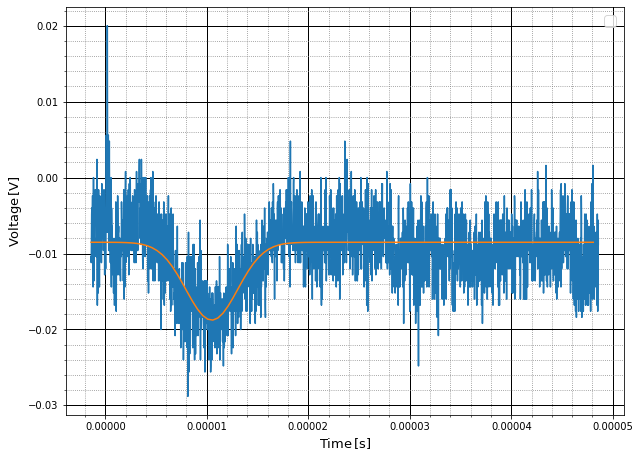

No handles with labels found to put in legend.


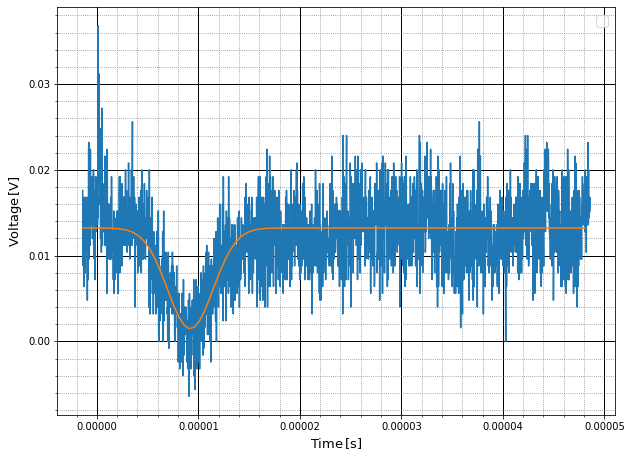

No handles with labels found to put in legend.


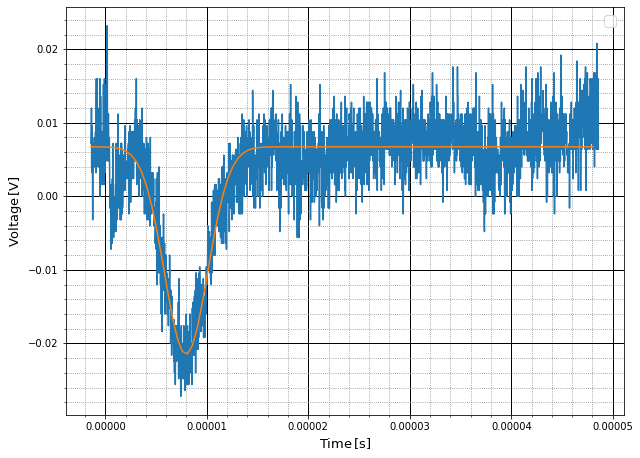

No handles with labels found to put in legend.


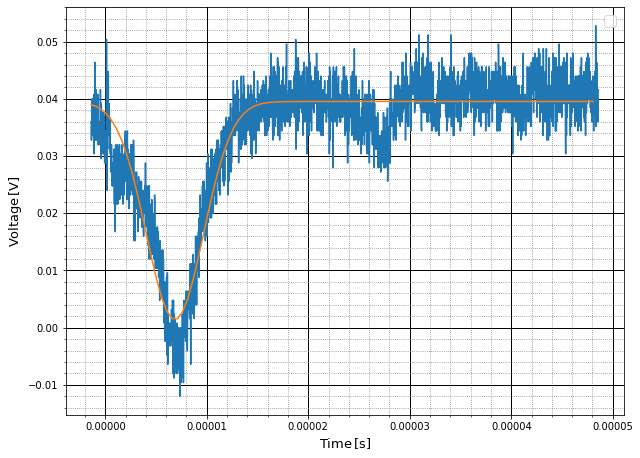

No handles with labels found to put in legend.


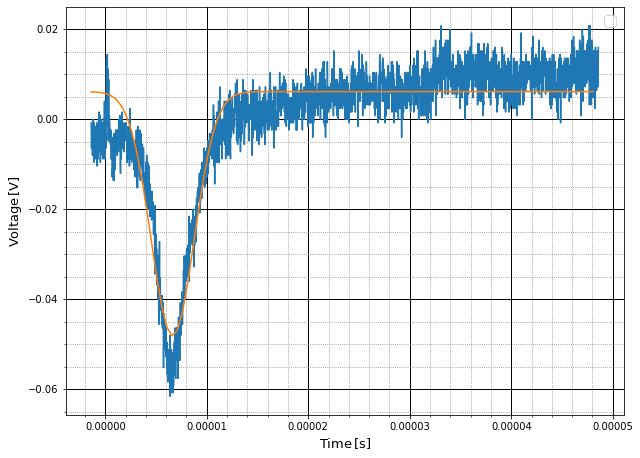

No handles with labels found to put in legend.


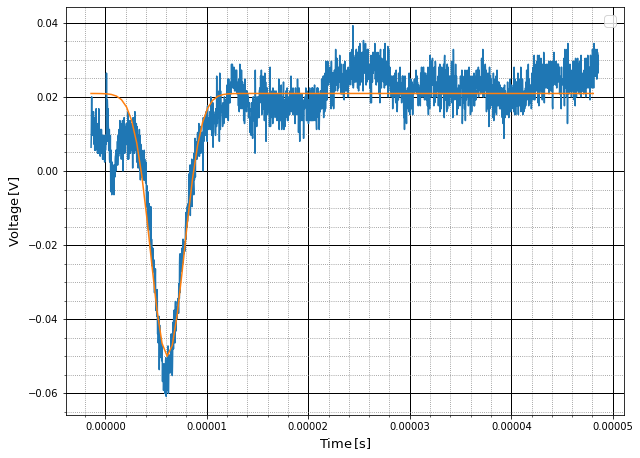

No handles with labels found to put in legend.


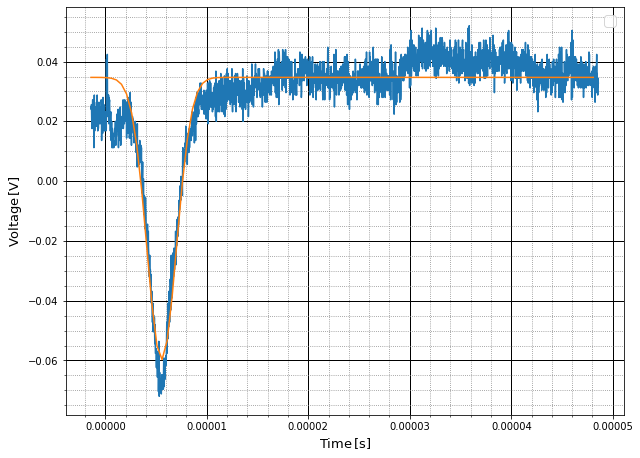

No handles with labels found to put in legend.


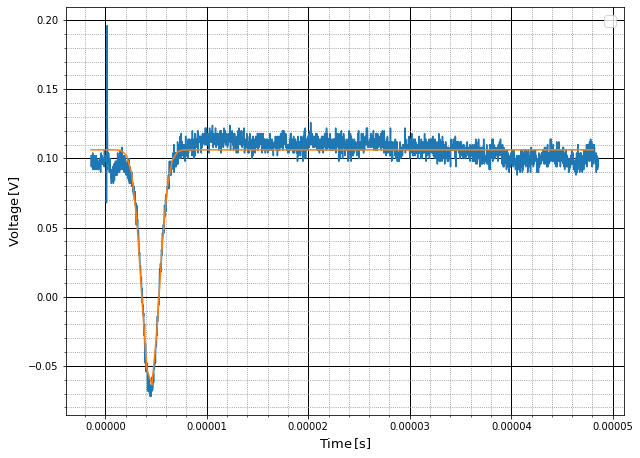

No handles with labels found to put in legend.


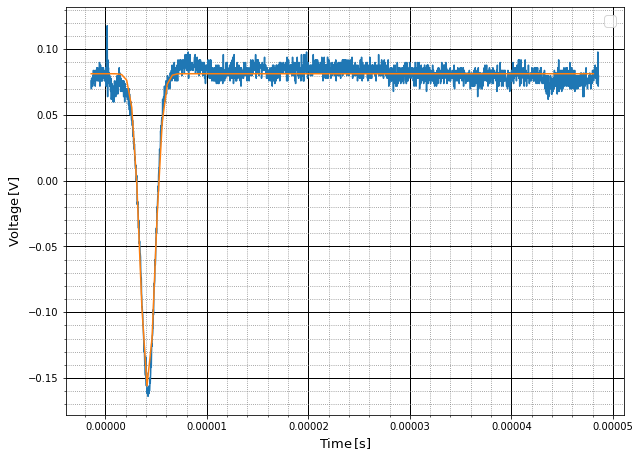

No handles with labels found to put in legend.


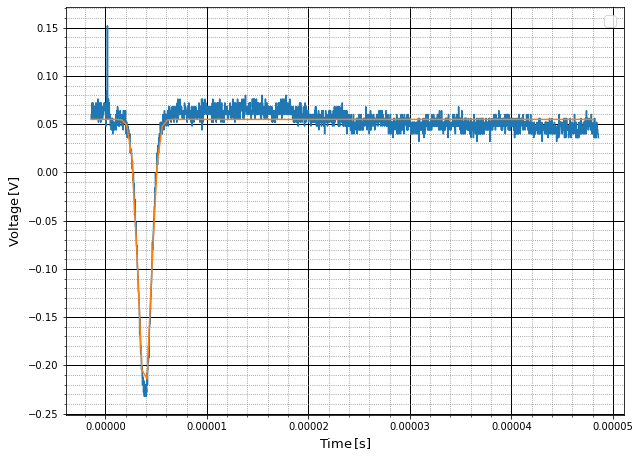

No handles with labels found to put in legend.


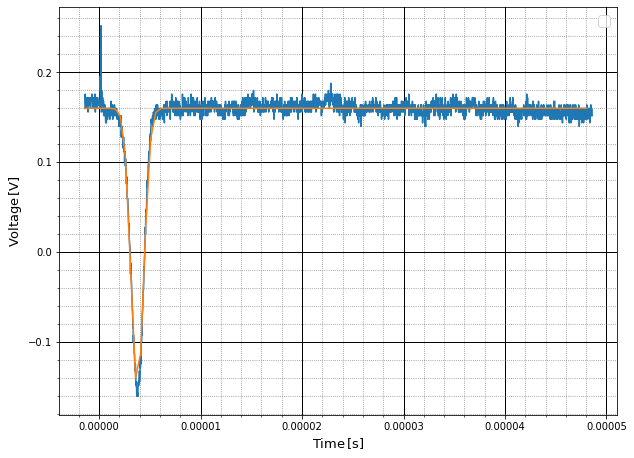

No handles with labels found to put in legend.


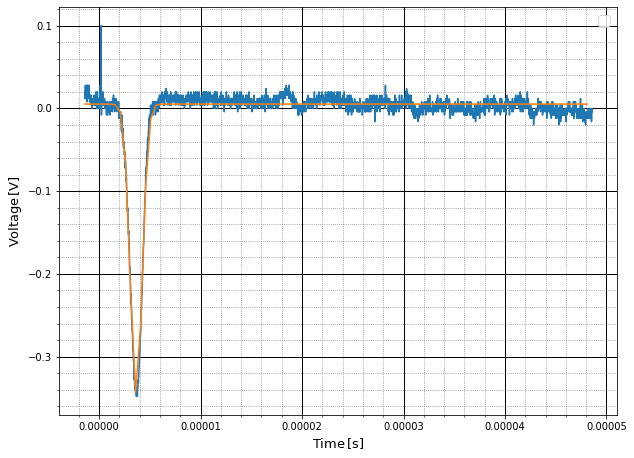

No handles with labels found to put in legend.


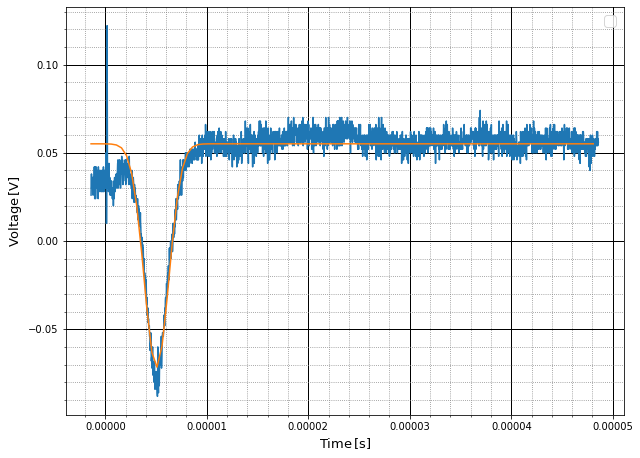

In [23]:
x_v_1, x_err_1 = Gauß(d1_1[3], d1_1[4], p0=[-0.000000000001,0.000003,0.00001,-0.01], r=None, d=None,Name='A1',Test=(False,True))
x_v_2, x_err_2 = Gauß(d2_1[3], d2_1[4], p0=[-0.000000000001,0.000003,0.00001,-0.01], r=None, d=None,Name='A2',Test=(False,True))
x_v_3, x_err_3 = Gauß(d3_1[3], d3_1[4], p0=[-0.000000000001,0.000003,0.00001,-0.01], r=None, d=None,Name='A3',Test=(False,True))
x_v_4, x_err_4 = Gauß(d4_1[3], d4_1[4], p0=[-0.000000000001,0.000003,0.00001,-0.01], r=None, d=None,Name='A4',Test=(False,True))
x_v_5, x_err_5 = Gauß(d5_1[3], d5_1[4], p0=[-0.000000000001,0.000003,0.00001,-0.01], r=None, d=None,Name='A5',Test=(False,True))
x_v_6, x_err_6 = Gauß(d6_1[3], d6_1[4], p0=[-0.000000000001,0.000003,0.00001,-0.01], r=None, d=None,Name='A6',Test=(False,True))
x_v_7, x_err_7 = Gauß(d7_1[3], d7_1[4], p0=[-0.000000000001,0.000003,0.00001,-0.01], r=None, d=None,Name='A7',Test=(False,True))
x_v_8, x_err_8 = Gauß(d8_1[3], d8_1[4], p0=[-0.000000000001,0.000003,0.00001,-0.01], r=None, d=None,Name='A8',Test=(False,True))
x_v_9, x_err_9 = Gauß(d9_1[3], d9_1[4], p0=[-0.000000000001,0.000003,0.00001,-0.01], r=None, d=None,Name='A9',Test=(False,True))
x_v_10, x_err_10 = Gauß(d10_1[3], d10_1[4], p0=[-0.000000000001,0.000003,0.00001,-0.01], r=None, d=None,Name='A10',Test=(False,True))
x_v_11, x_err_11 = Gauß(d11_1[3], d11_1[4], p0=[-0.000000000001,0.000003,0.00001,-0.01], r=None, d=None,Name='A11',Test=(False,True))
x_v_12, x_err_12 = Gauß(d12_1[3], d12_1[4], p0=[-0.000000000001,0.000003,0.00001,-0.01], r=None, d=None,Name='A12',Test=(False,True))
x_v_13, x_err_13 = Gauß(d13_1[3], d13_1[4], p0=[-0.000000000001,0.000003,0.00001,-0.01], r=None, d=None,Name='A13',Test=(False,True))

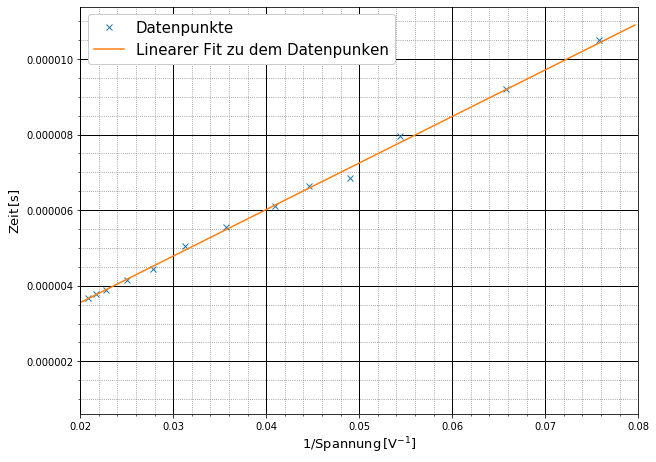

In [20]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

x_c = [x_v_1[2],x_v_2[2],x_v_3[2],x_v_4[2],x_v_5[2],x_v_6[2],x_v_7[2],x_v_13[2],x_v_8[2],x_v_9[2],x_v_10[2],x_v_11[2],x_v_12[2]]
x_c_v = []
x_c_e = []
for i in range(len(x_c)):
    x_c_v.append(x_c[i].nominal_value)
for i in range(len(x_c)):
    x_c_e.append(x_c[i].std_dev)
xnew, ynew = linfit([1/13.2,1/15.2,1/18.4,1/20.4,1/22.4,1/24.4,1/28.0,1/32.0,1/36,1/40,1/44,1/46,1/48],x_c_v,d=(0,0.08),sigma=x_c_e)    
µ_pm = linfit_pm([1/13.2,1/15.2,1/18.4,1/20.4,1/22.4,1/24.4,1/28.0,1/32.0,1/36,1/40,1/44,1/46,1/48],x_c_v,sigma=x_c_e)
plt.plot([1/13.2,1/15.2,1/18.4,1/20.4,1/22.4,1/24.4,1/28.0,1/32.0,1/36,1/40,1/44,1/46,1/48], x_c_v,'x',label='Datenpunkte')
plt.plot(xnew, ynew,label='Linearer Fit zu dem Datenpunken')



#xnew, ynew = linfit(x_c_v,[1/13.2,1/15.2,1/18.4,1/20.4,1/22.4,1/24.4,1/28.0,1/32.0,1/36,1/40,1/44,1/46,1/48])    
µ2_pm = linfit_pm(x_c_v,[1/13.2,1/15.2,1/18.4,1/20.4,1/22.4,1/24.4,1/28.0,1/32.0,1/36,1/40,1/44,1/46,1/48])
#plt.plot(x_c_v,[1/13.2,1/15.2,1/18.4,1/20.4,1/22.4,1/24.4,1/28.0,1/32.0,1/36,1/40,1/44,1/46,1/48],'ro')
#plt.plot(xnew, ynew,label='Linearer Fit zu dem Datenpunken')

###   Label / Title

plt.xlabel(r'1/Spannung$\,[\mathrm{V^{-1}}]$', fontsize=13)
plt.ylabel(r'Zeit$\,[\mathrm{s}]$', fontsize=13)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([0.02,0.08])
#axes.set_ylim([-300,370])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15, framealpha=1)
plt.savefig('V2Abstand2.png')
plt.show()

In [12]:
print('{:L}'.format(3 * 0.16  / µ_pm[0][0]))

\left(3.90 \pm 0.07\right) \times 10^{3}


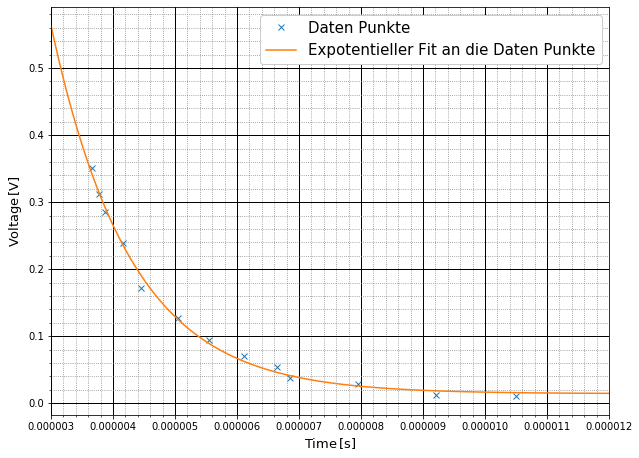

In [19]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot
    
x_P = [x_v_1[0],x_v_2[0],x_v_3[0],x_v_4[0],x_v_5[0],x_v_6[0],x_v_7[0],x_v_13[0],x_v_8[0],x_v_9[0],x_v_10[0],x_v_11[0],x_v_12[0]]
x_s = [x_v_1[1],x_v_2[1],x_v_3[1],x_v_4[1],x_v_5[1],x_v_6[1],x_v_7[1],x_v_13[1],x_v_8[1],x_v_9[1],x_v_10[1],x_v_11[1],x_v_12[1]]
x_A = []
for i in range(len(x_s)):
    k = x_P[i] * (1 / (2 * pi * x_s[i]**2))
    x_A.append(k)
x_A_v = []
x_A_e = []
for i in range(len(x_A)):
    x_A_v.append(x_A[i].nominal_value)
for i in range(len(x_A)):
    x_A_e.append(x_A[i].std_dev)
x_P_v = []
x_P_e = []
for i in range(len(x_P)):
    x_P_v.append(x_P[i].nominal_value)
for i in range(len(x_P)):
    x_P_e.append(x_P[i].std_dev)
x_s_v = []
x_s_e = []
for i in range(len(x_s)):
    x_s_v.append(x_s[i].nominal_value)
for i in range(len(x_s)):
    x_s_e.append(x_s[i].std_dev)

x_test = arange(0,0.0001,0.000001)
p0 = [1,0.00001,0]
#plt.plot(x_test, p0[0]*e**(-x_test/p0[1])+p0[2])    

#easyGauß(x_v_1, N= r' $-13.2\,[\mathrm{V}]$', farbe='red')
#easyGauß(x_v_2, N= r' $-15.2\,[\mathrm{V}]$', farbe='gold')
#easyGauß(x_v_3, N= r' $-18.4\,[\mathrm{V}]$', farbe='blue')
#easyGauß(x_v_4, N= r' $-20.4\,[\mathrm{V}]$')
#easyGauß(x_v_5, N= r' $-22.4\,[\mathrm{V}]$')
#easyGauß(x_v_6, N= r' $-24.4\,[\mathrm{V}]$')
#easyGauß(x_v_7, N= r' $-28.0\,[\mathrm{V}]$')
#easyGauß(x_v_13, N= r' $-32.0\,[\mathrm{V}]$')
#easyGauß(x_v_8, N= r' $-36.0\,[\mathrm{V}]$', farbe='navy')
#easyGauß(x_v_9, N= r' $-40.0\,[\mathrm{V}]$', farbe='lawngreen')
#easyGauß(x_v_10, N= r' $-44.0\,[\mathrm{V}]$', farbe='darkviolet')
#easyGauß(x_v_11, N= r' $-46.0\,[\mathrm{V}]$', farbe='aqua')
#easyGauß(x_v_12, N= r' $-48.0\,[\mathrm{V}]$', farbe='darkred')

xnew, ynew = exfit(x_c_v, -1*np.array(x_A_v),p0,d=(0.000003,0.00002))    
tau2_pm = exfit_pm(x_c_v, -1*np.array(x_A_v),p0)
plt.plot(x_c_v, -1 * np.array(x_A_v),'x',label='Daten Punkte')
plt.plot(xnew, ynew, label='Expotentieller Fit an die Daten Punkte')

###   Label / Title

plt.ylabel(r'Voltage$\,[\mathrm{V}]$', fontsize=13)
plt.xlabel(r'Time$\,[\mathrm{s}]$', fontsize=13)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([0.000003,0.000012])
#axes.set_ylim([-300,370])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15, framealpha=1)
plt.savefig('V2Abstand3.png')
plt.show()

In [14]:
print('{:L}'.format(tau2_pm[0][1]))

\left(1.28 \pm 0.08\right) \times 10^{-6}


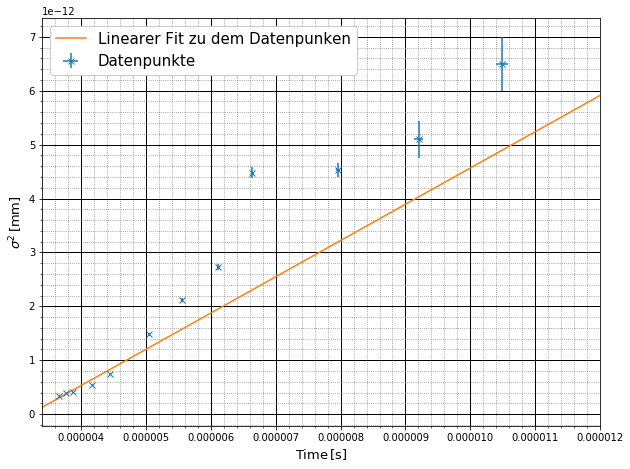

In [18]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot
x_c_gk = [x_v_1[2],x_v_2[2],x_v_3[2],x_v_5[2],x_v_6[2],x_v_7[2],x_v_8[2],x_v_9[2],x_v_10[2],x_v_11[2],x_v_12[2],x_v_13[2]]
x_c_v_gk = []
x_c_e_gk = []
for i in range(len(x_c_gk)):
    x_c_v_gk.append(x_c_gk[i].nominal_value)
for i in range(len(x_c_gk)):
    x_c_e_gk.append(x_c_gk[i].std_dev)
    
p0 = [0.0000001,0]
x_s_gk = np.array([x_v_1[1],x_v_2[1],x_v_3[1],x_v_5[1],x_v_6[1],x_v_7[1],x_v_8[1],x_v_9[1],x_v_10[1],x_v_11[1],x_v_12[1],x_v_13[1]])**2
x_s_v_gk = []
x_s_e_gk = []
for i in range(len(x_s_gk)):
    x_s_v_gk.append(x_s_gk[i].nominal_value)
for i in range(len(x_s_gk)):
    x_s_e_gk.append(x_s_gk[i].std_dev)
x_test = arange(0,0.0001,0.000001)
#plt.plot(x_test, np.sqrt(p0[0]*x_test)+p0[1])

xnew, ynew = linfit(x_c_v_gk, np.array(x_s_v_gk),d=(0.0000034,0.000013),sigma= x_s_e_gk)
s_pm = linfit_pm(x_c_v_gk, np.array(x_s_v_gk),sigma= x_s_e_gk)
plt.errorbar(x_c_v_gk, np.array(x_s_v_gk), x_s_e_gk,x_c_e_gk,fmt="x",label='Datenpunkte')
#plt.plot(x_c_v_gk, np.array(x_s_v_gk), 'x',label='Datenpunkte')
plt.plot(xnew, ynew, label='Linearer Fit zu dem Datenpunken')

###   Label / Title

plt.ylabel(r'$\sigma^2\,[\mathrm{mm}]$', fontsize=13)
plt.xlabel(r'Time$\,[\mathrm{s}]$', fontsize=13)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([0.0000034,0.000012])
#axes.set_ylim([-300,370])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15, framealpha=1)
plt.savefig('V2Abstand4.png')
plt.show()

In [17]:
print('{:L}'.format((s_pm[0][0]/2)*10**2))

\left(3.4 \pm 0.5\right) \times 10^{-5}


In [25]:
print((3.90-3.900)/0.07 )
print((1.28-45)/ 0.08)
print(((3.4*10**-6)-101) / 0.5)

0.0
-546.5
-201.9999932
